In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/satellite-imagery/Satellite_Imagery_Analysis-main/.gitignore
/kaggle/input/satellite-imagery/Satellite_Imagery_Analysis-main/README.md
/kaggle/input/satellite-imagery/Satellite_Imagery_Analysis-main/LICENSE.txt
/kaggle/input/satellite-imagery/Satellite_Imagery_Analysis-main/code/Sundarbans_Satellite_Imagery_Analysis_using_Python.ipynb
/kaggle/input/satellite-imagery/Satellite_Imagery_Analysis-main/code/Unsupervised_Learning_in_Satellite_Imagery_using_Python.ipynb
/kaggle/input/satellite-imagery/Satellite_Imagery_Analysis-main/Classification/Land_Cover_Classification_in_Satellite_Imagery_using_Python.ipynb
/kaggle/input/satellite-imagery/Satellite_Imagery_Analysis-main/Data/ReadMe.md
/kaggle/input/satellite-imagery/Satellite_Imagery_Analysis-main/Data/sundarbans_data/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_True_color.tiff
/kaggle/input/satellite-imagery/Satellite_Imagery_Analysis-main/Data/sundarbans_data/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B07_(Raw).

In [2]:
pip install earthpy

     |████████████████████████████████| 1.4 MB 7.0 MB/s 
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import rasterio as rio
import earthpy.plot as ep

In [4]:
# Find and sort Sentinel band files
band_files = sorted(glob.glob("../input/satellite-imagery/Satellite_Imagery_Analysis-main/Data/sundarbans_data/*B?*.tiff"))

In [5]:
# Load band data
band_data = []
for band_file in band_files:
    with rio.open(band_file, 'r') as src:
        band_data.append(src.read(1))

if len(band_data) == 0:
    print("No band data found.")
else:
    # Stack band data
    stacked_data = np.stack(band_data)

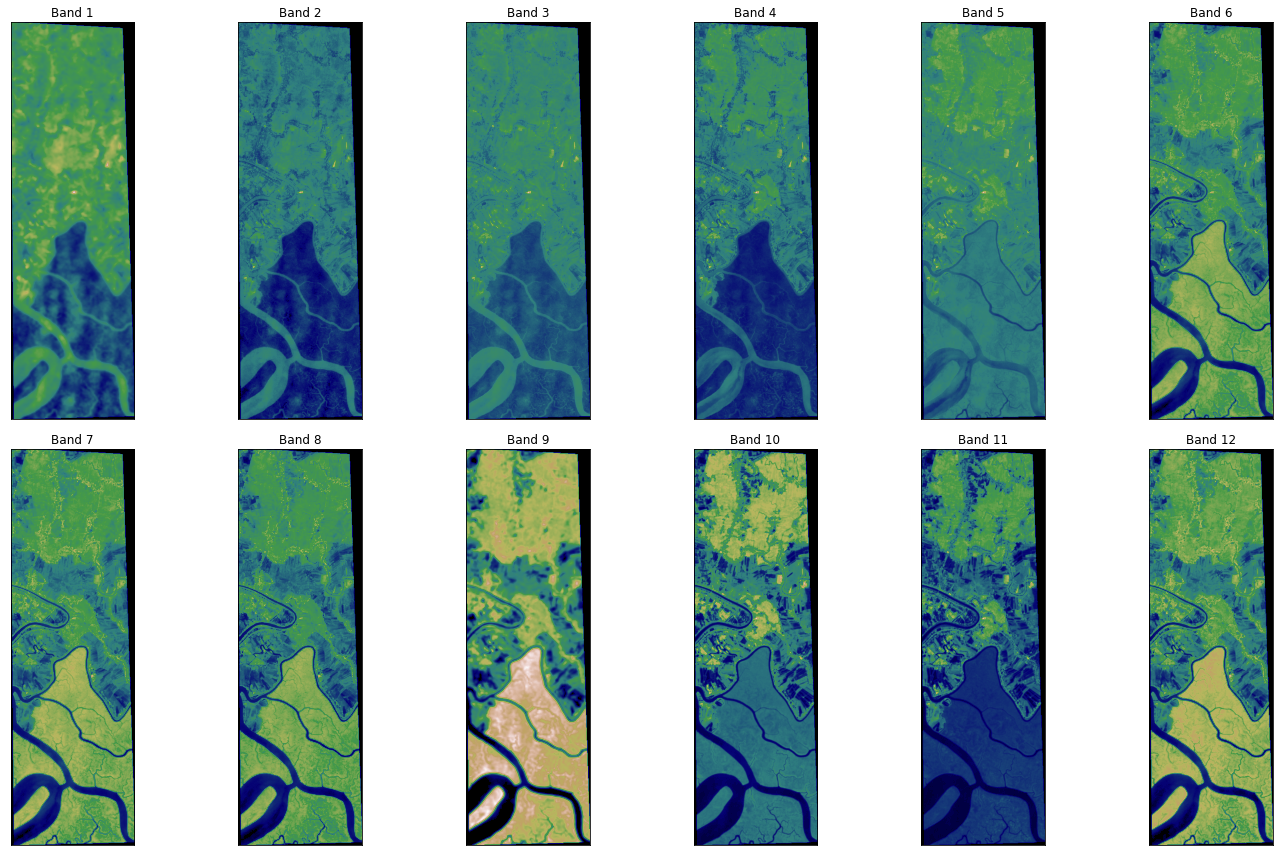

In [6]:
# Plot individual bands
ep.plot_bands(stacked_data, figsize=(20, 12), cmap='gist_earth', cols=6, cbar=False)
plt.show()

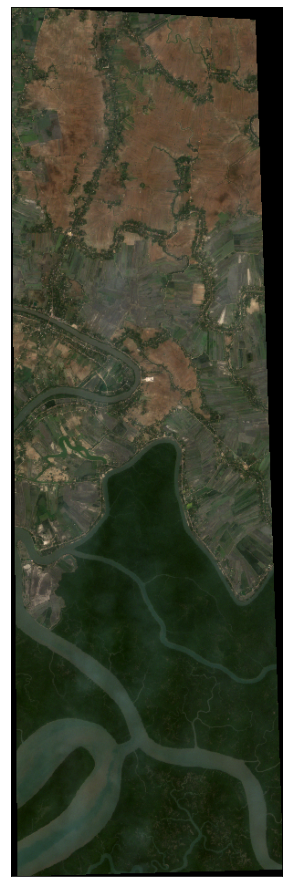

In [7]:
# Create RGB composite images
rgb_composite = ep.plot_rgb(stacked_data, rgb=(3, 2, 1), figsize=(10, 16))
plt.show()

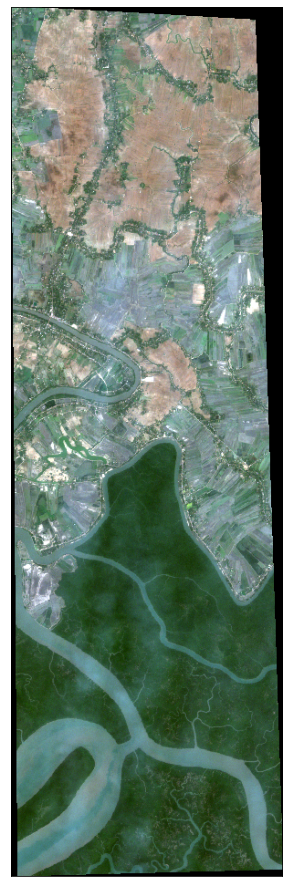

In [8]:
# Create RGB composite images with stretch
rgb_composite_stretch = ep.plot_rgb(stacked_data, rgb=(3, 2, 1), stretch=True, str_clip=0.2, figsize=(10, 16))
plt.show()

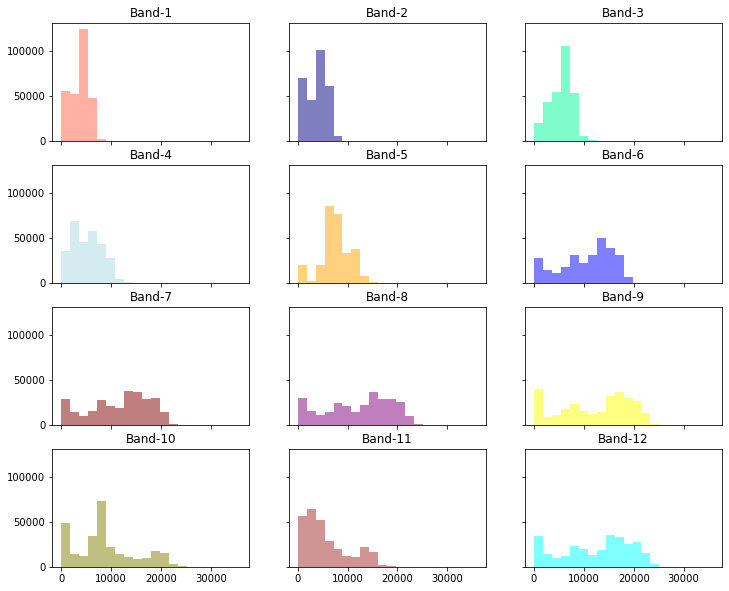

In [9]:
# Plot histograms for each band
colors = ['tomato', 'navy', 'MediumSpringGreen', 'lightblue', 'orange', 'blue',
          'maroon', 'purple', 'yellow', 'olive', 'brown', 'cyan']
ep.hist(stacked_data, colors=colors, title=[f'Band-{i}' for i in range(1, 13)], cols=3, alpha=0.5, figsize=(12, 10))
plt.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


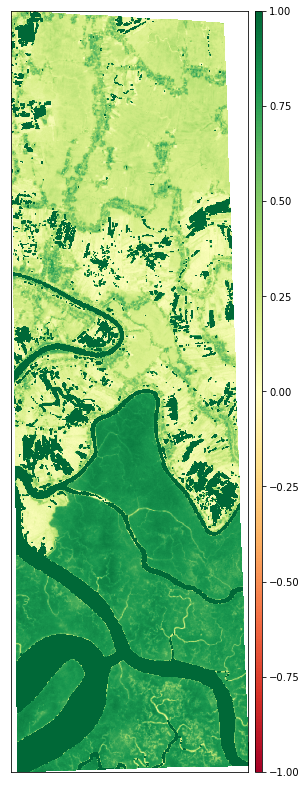

In [10]:
# Calculate and plot NDVI
ndvi = (stacked_data[7] - stacked_data[3]) / (stacked_data[7] + stacked_data[3])
ep.plot_bands(ndvi, cmap="RdYlGn", cols=1, vmin=-1, vmax=1, figsize=(10, 14))
plt.show()

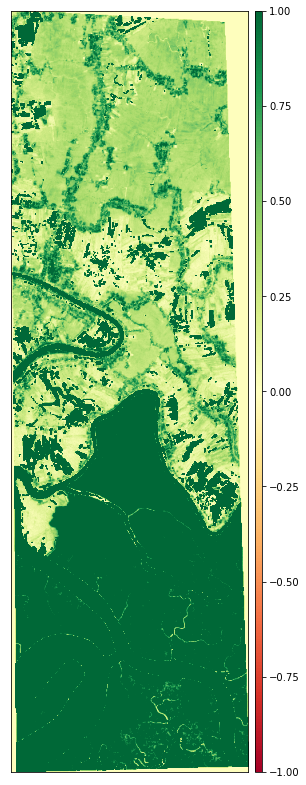

In [11]:
# Calculate and plot SAVI
L = 0.5
savi = ((stacked_data[7] - stacked_data[3]) / (stacked_data[7] + stacked_data[3] + L)) * (1 + L)
ep.plot_bands(savi, cmap="RdYlGn", cols=1, vmin=-1, vmax=1, figsize=(10, 14))
plt.show()

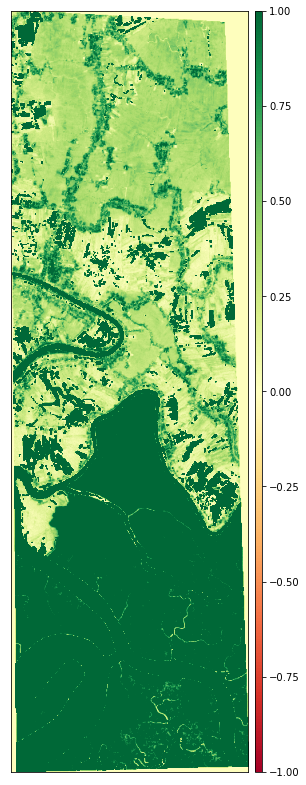

In [12]:
# Calculate and plot SAVI
L = 0.5
savi = ((stacked_data[7] - stacked_data[3]) / (stacked_data[7] + stacked_data[3] + L)) * (1 + L)
ep.plot_bands(savi, cmap="RdYlGn", cols=1, vmin=-1, vmax=1, figsize=(10, 14))
plt.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


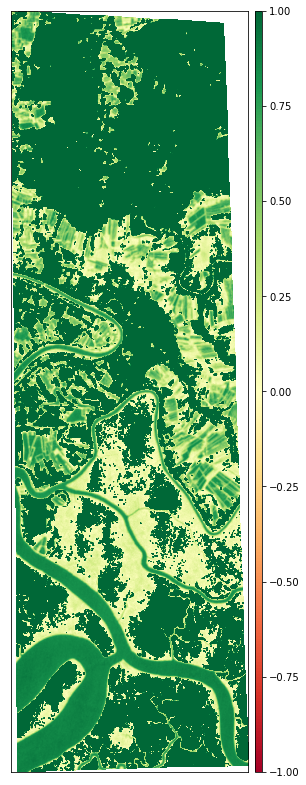

In [13]:
# Calculate and plot MNDWI
mndwi = (stacked_data[2] - stacked_data[10]) / (stacked_data[2] + stacked_data[10])
ep.plot_bands(mndwi, cmap="RdYlGn", cols=1, vmin=-1, vmax=1, figsize=(10, 14))
plt.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


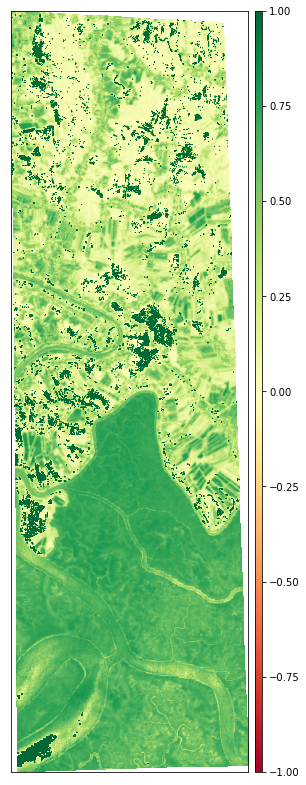

In [14]:
# Calculate and plot NDMI
ndmi = (stacked_data[7] - stacked_data[10]) / (stacked_data[7] + stacked_data[10])
ep.plot_bands(ndmi, cmap="RdYlGn", cols=1, vmin=-1, vmax=1, figsize=(10, 14))
plt.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


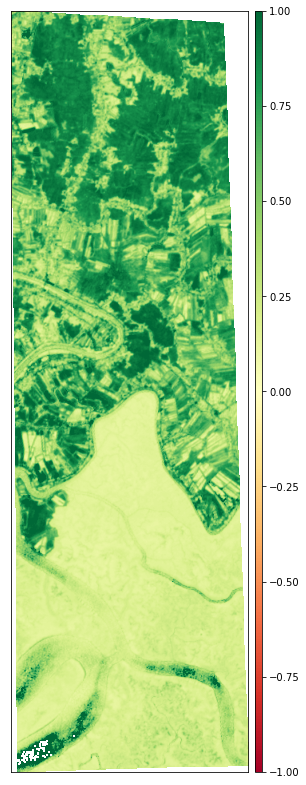

In [15]:
# Calculate and plot CMR
cmr = stacked_data[10] / stacked_data[11]
ep.plot_bands(cmr, cmap="RdYlGn", cols=1, vmin=-1, vmax=1, figsize=(10, 14))
plt.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


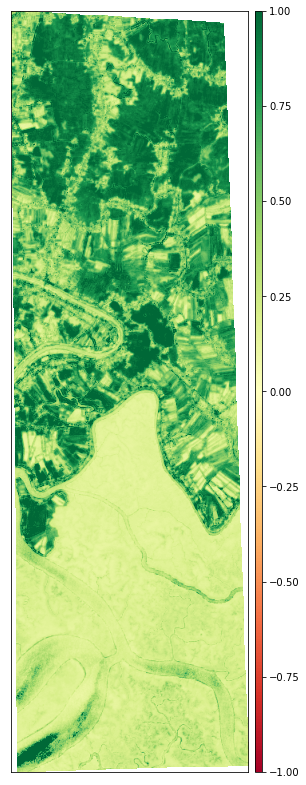

In [16]:
# Calculate and plot FMR
fmr = stacked_data[10] / stacked_data[7]
ep.plot_bands(fmr, cmap="RdYlGn", cols=1, vmin=-1, vmax=1, figsize=(10, 14))
plt.show()